In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import pylab

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline
plt.style.use('ggplot')

In [2]:
file_name = 'SampleData_Section5.csv'
df_raw = pd.read_csv(file_name, parse_dates =['date_time'], na_values='Na')

In [3]:
df_raw.describe()

,engine_room_T,scav_air_P,No1_TC_speed,No2_TC_speed,No1_TC_gas_in_T,No2_TC_gas_in_T,No1_TC_gas_out_T,No2_TC_gas_out_T,main_engine_speed,main_engine_output,fuel_command
count,70999.000000,70997.000000,70999.000000,70999.000000,70999.000000,70999.000000,70999.000000,70999.000000,70999.000000,70998.000000,70999.000000
mean,41.163608,0.170523,11160.996634,11133.931464,373.453866,374.551909,248.691587,248.812448,48.585332,13346.788275,41.696828
std,5.718328,0.097244,5907.034548,5892.562381,161.360626,162.887740,98.474791,98.690624,26.000045,7616.373230,22.887051
min,18.000000,-0.001000,100.000000,0.000000,28.000000,30.000000,28.000000,30.000000,-44.000000,0.000000,0.000000
25%,37.000000,0.132000,11700.000000,11700.000000,329.000000,327.000000,231.000000,230.000000,51.000000,9136.000000,35.600000
50%,43.000000,0.234000,14700.000000,14700.000000,462.000000,463.000000,298.000000,297.000000,64.000000,18166.000000,55.100000
75%,46.000000,0.239000,14800.000000,14800.000000,477.000000,480.000000,309.000000,311.000000,65.000000,18846.000000,57.200000
max,51.000000,0.272000,15400.000000,15300.000000,525.000000,523.000000,347.000000,346.000000,65.000000,21198.000000,64.000000


In [4]:
for item in df_raw.columns:
    if item != "date_time":
        df_raw[item] = df_raw[item].astype(float)

df_raw.dtypes

date_time             datetime64[ns]
engine_room_T                float64
scav_air_P                   float64
No1_TC_speed                 float64
No2_TC_speed                 float64
No1_TC_gas_in_T              float64
No2_TC_gas_in_T              float64
No1_TC_gas_out_T             float64
No2_TC_gas_out_T             float64
main_engine_speed            float64
main_engine_output           float64
fuel_command                 float64
dtype: object

(0, 16000)

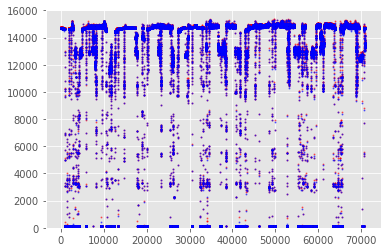

In [7]:
a=df_raw[['No1_TC_speed']]
b=df_raw[['No2_TC_speed']]
plt.plot(a, "or", markersize=1, alpha=0.5)
plt.plot(b, "ob", markersize=1, alpha=0.5)
plt.ylim(0,16000)

In [8]:
df_raw.isnull().sum()

date_time             0
engine_room_T         0
scav_air_P            2
No1_TC_speed          0
No2_TC_speed          0
No1_TC_gas_in_T       0
No2_TC_gas_in_T       0
No1_TC_gas_out_T      0
No2_TC_gas_out_T      0
main_engine_speed     0
main_engine_output    1
fuel_command          0
dtype: int64

In [9]:
df_clean = df_raw.dropna(axis=0).copy()

In [10]:
df_clean.head()

,date_time,engine_room_T,scav_air_P,No1_TC_speed,No2_TC_speed,No1_TC_gas_in_T,No2_TC_gas_in_T,No1_TC_gas_out_T,No2_TC_gas_out_T,main_engine_speed,main_engine_output,fuel_command
0,2018-01-02 00:01:00,43.0,0.232,14800.0,14700.0,464.0,464.0,299.0,298.0,64.0,18161.0,55.6
1,2018-01-02 00:05:00,43.0,0.233,14800.0,14700.0,464.0,464.0,299.0,298.0,65.0,18312.0,55.2
2,2018-01-02 00:10:00,43.0,0.233,14800.0,14700.0,464.0,464.0,299.0,298.0,64.0,18161.0,55.6
3,2018-01-02 00:14:00,43.0,0.232,14800.0,14700.0,464.0,464.0,299.0,298.0,65.0,18312.0,55.2
4,2018-01-02 00:18:00,43.0,0.232,14800.0,14700.0,464.0,464.0,299.0,298.0,65.0,18278.0,55.1


In [11]:
TC_speed_mean = (df_raw.No1_TC_speed + df_raw.No2_TC_speed)/2
TC_gas_in_mean = (df_raw.No1_TC_gas_in_T + df_raw.No2_TC_gas_in_T)/2
TC_gas_out_mean = (df_raw.No1_TC_gas_out_T + df_raw.No2_TC_gas_out_T)/2

In [22]:
df_sel = pd.DataFrame()

df_sel['TC_speed_iso'] = (298/(273 + df_raw.engine_room_T))**0.5*TC_speed_mean
df_sel['TC_gas_in_T_iso'] = TC_gas_in_mean - (df_raw.engine_room_T - 25)*1.5
df_sel['TC_gas_out_T_iso'] = TC_gas_out_mean - (df_raw.engine_room_T - 25)*1.5
df_sel['scav_air_P_abs_iso'] = (1 - (df_raw.engine_room_T - 25)*3/1000)*(df_raw.scav_air_P +0.1)
df_sel['fuel_cammand_iso'] = (1 - (df_raw.engine_room_T - 25)*0.8/1000)*df_raw.fuel_command

(0, 16000)

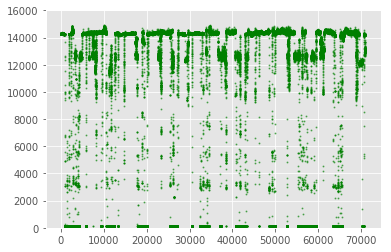

In [23]:
c=df_raw[['No1_TC_speed']]
d=df_raw[['No2_TC_speed']]
e=df_raw[['TC_speed_iso']]
#plt.plot(c, "or", markersize=1, alpha=0.5)
#plt.plot(d, "ob", markersize=1, alpha=0.5)
plt.plot(e, "og", markersize=1, alpha=0.5)
plt.ylim(0,16000)

In [57]:
filter_sql = "TC_speed_iso >= 12000 "
df_sel=df_sel.query(filter_sql).copy()

In [67]:
df_sel

,TC_speed_iso,TC_gas_in_T_iso,TC_gas_out_T_iso,scav_air_P_abs_iso,fuel_cammand_iso
0,14323.745996,437.0,271.5,0.314072,54.79936
1,14323.745996,437.0,271.5,0.315018,54.40512
2,14323.745996,437.0,271.5,0.315018,54.79936
3,14323.745996,437.0,271.5,0.314072,54.40512
4,14323.745996,437.0,271.5,0.314072,54.30656
5,14323.745996,437.0,271.5,0.314072,54.40512
6,14323.745996,436.5,271.5,0.315018,54.20800
7,14323.745996,436.0,271.0,0.315018,54.20800
8,14275.190925,436.5,271.0,0.314072,54.30656
9,14323.745996,437.0,271.0,0.314072,54.20800


(10000, 15000)

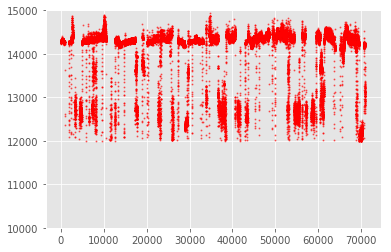

In [66]:
k=df_sel2[['TC_speed_iso']]
plt.plot(k, "or", markersize=1, alpha=0.5)
plt.ylim(10000,15000)

(0, 600)

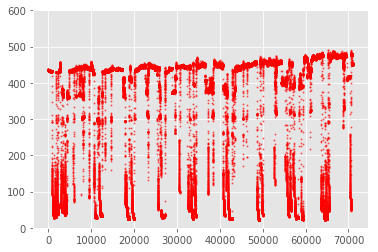

In [35]:
f=df_raw[['TC_gas_in_T_iso']]
plt.plot(f, "or", markersize=1, alpha=0.5)
plt.ylim(0,600)

(0, 500)

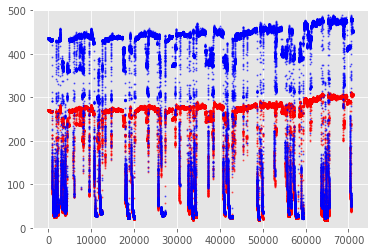

In [37]:
g=df_raw[['TC_gas_out_T_iso']]
plt.plot(g, "or", markersize=1, alpha=0.5)
plt.plot(f, "ob", markersize=1, alpha=0.5)
plt.ylim(0,500)

(0, 0.4)

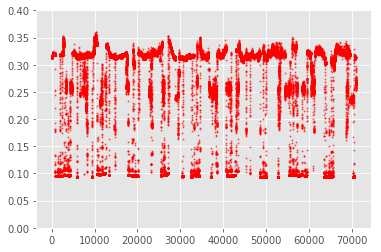

In [41]:
f=df_raw[['scav_air_P_abs_iso']]
plt.plot(f, "or", markersize=1, alpha=0.5)
plt.ylim(0,0.4)

In [60]:
df_sel

,TC_speed_iso,TC_gas_in_T_iso,TC_gas_out_T_iso,scav_air_P_abs_iso,fuel_cammand_iso
0,14323.745996,437.0,271.5,0.314072,54.79936
1,14323.745996,437.0,271.5,0.315018,54.40512
2,14323.745996,437.0,271.5,0.315018,54.79936
3,14323.745996,437.0,271.5,0.314072,54.40512
4,14323.745996,437.0,271.5,0.314072,54.30656
5,14323.745996,437.0,271.5,0.314072,54.40512
6,14323.745996,436.5,271.5,0.315018,54.20800
7,14323.745996,436.0,271.0,0.315018,54.20800
8,14275.190925,436.5,271.0,0.314072,54.30656
9,14323.745996,437.0,271.0,0.314072,54.20800


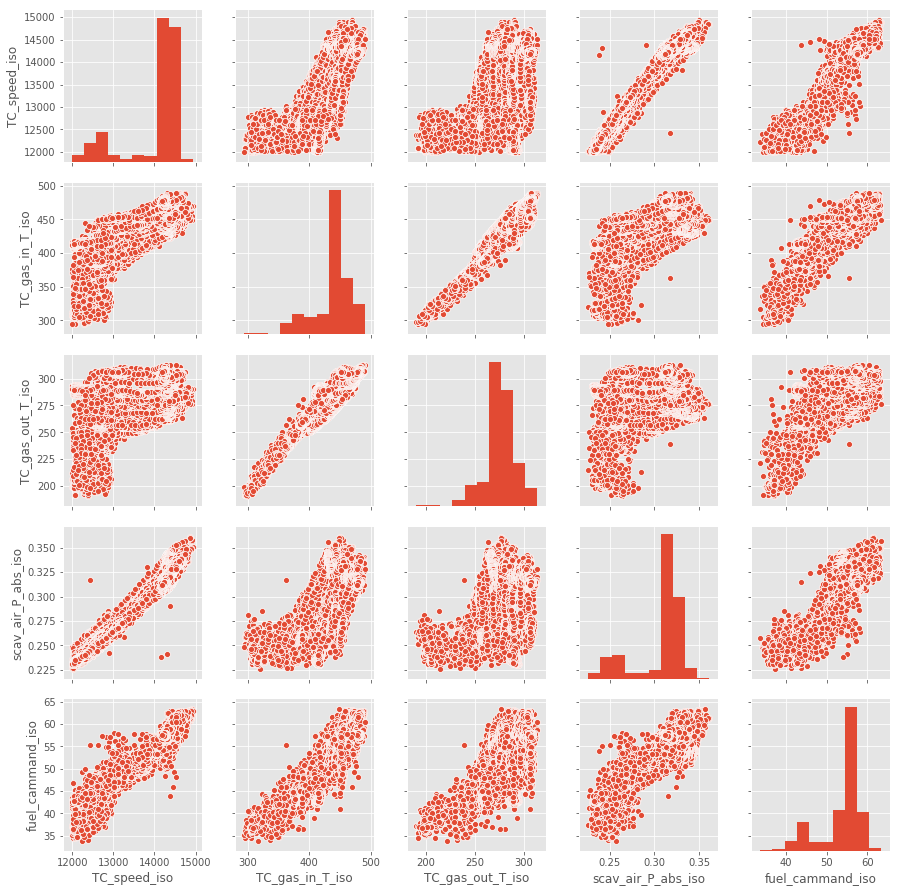

In [61]:
sn.pairplot(df_sel)

In [69]:
dev_num = 2
df_sel['date_time_factor'] = pd.cut(df_raw['date_time'], dev_num, labels = False)
col = df_sel['date_time_factor']

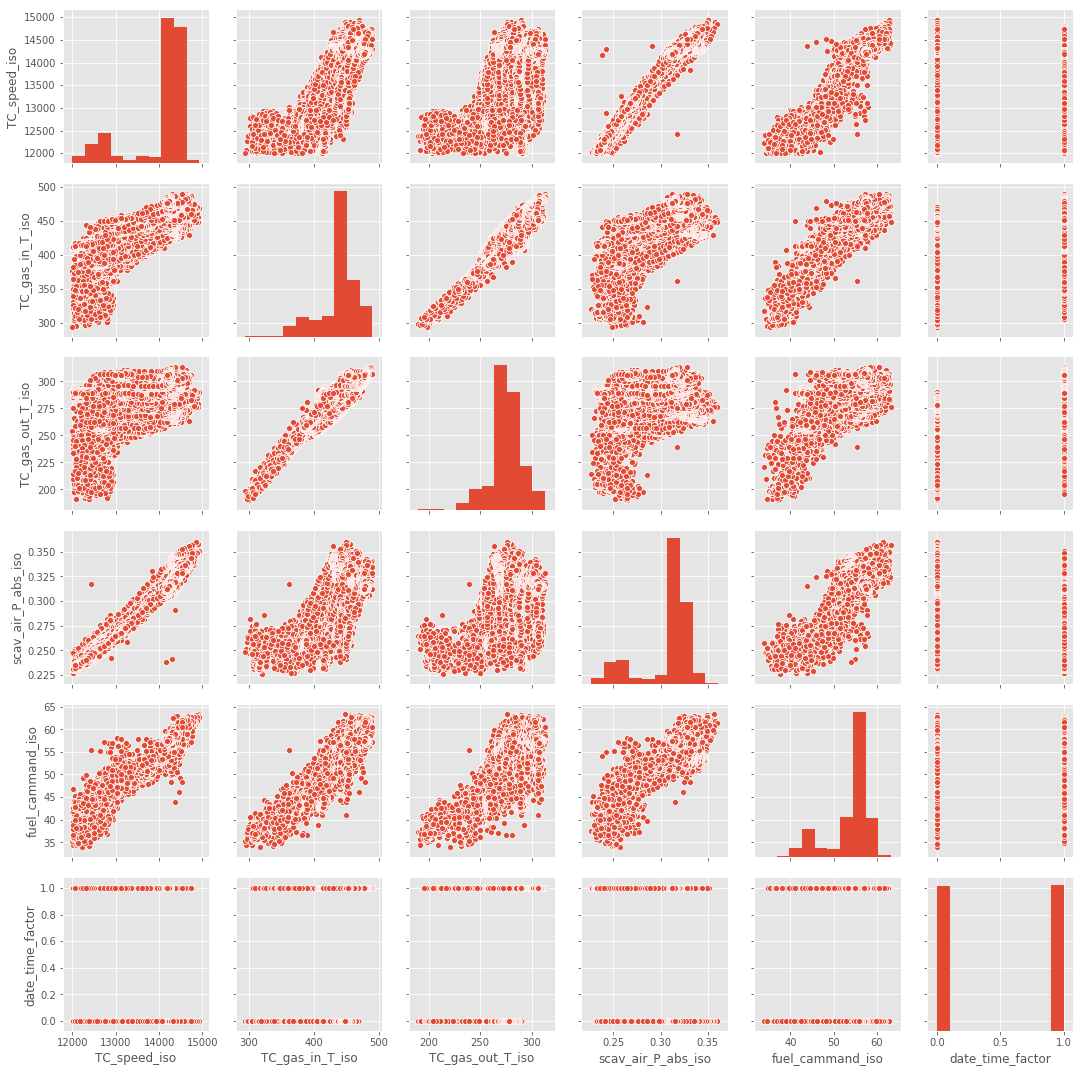

In [70]:
sn.pairplot(df_sel)